In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA

In [2]:
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Features:", feature_names)
print("Classes:", target_names)
print("Shape X:", X.shape, "y:", y.shape)

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Classes: ['setosa' 'versicolor' 'virginica']
Shape X: (150, 4) y: (150,)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)
print("Train size:", X_train.shape[0], "Test size:", X_test.shape[0])

Train size: 120 Test size: 30


In [4]:
ks = list(range(1, 16))
accuracies = []
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc = accuracy_score(y_test, knn.predict(X_test))
    accuracies.append(acc)

for k, acc in zip(ks, accuracies):
    print(f"k={k:2d} -> test accuracy = {acc:.4f}")

k= 1 -> test accuracy = 0.9667
k= 2 -> test accuracy = 0.9333
k= 3 -> test accuracy = 0.9333
k= 4 -> test accuracy = 0.9333
k= 5 -> test accuracy = 0.9333
k= 6 -> test accuracy = 0.9333
k= 7 -> test accuracy = 0.9667
k= 8 -> test accuracy = 0.9333
k= 9 -> test accuracy = 0.9667
k=10 -> test accuracy = 0.9667
k=11 -> test accuracy = 0.9667
k=12 -> test accuracy = 0.9667
k=13 -> test accuracy = 0.9667
k=14 -> test accuracy = 0.9333
k=15 -> test accuracy = 0.9333


In [5]:
param_grid = {'n_neighbors': ks}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid.fit(X_scaled, y)
print("Best K (CV):", grid.best_params_, "CV best score:", grid.best_score_)

Best K (CV): {'n_neighbors': 6} CV best score: 0.9733333333333333


In [6]:
best_k = grid.best_params_['n_neighbors']
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
y_pred = best_knn.predict(X_test)

print("Test accuracy (best K):", accuracy_score(y_test, y_pred))
print("\nClassification report:")
print(classification_report(y_test, y_pred, target_names=target_names))

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion matrix:\n", cm)

Test accuracy (best K): 0.9333333333333333

Classification report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30


Confusion matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  2  8]]


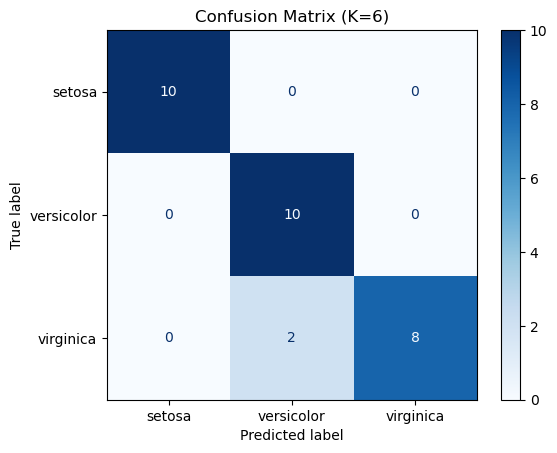

In [7]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap='Blues')
plt.title(f"Confusion Matrix (K={best_k})")
plt.show()

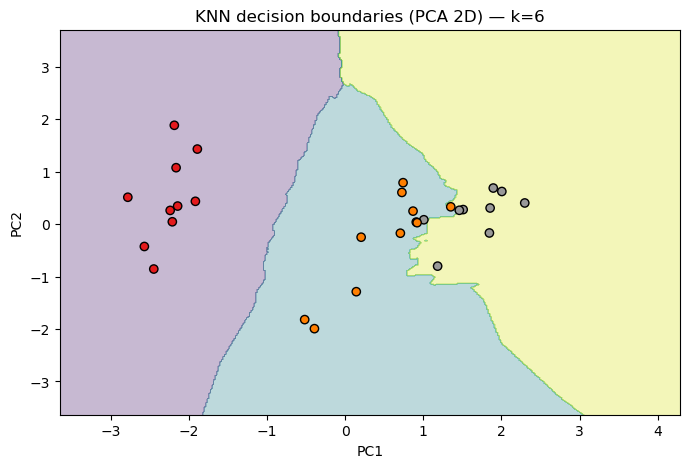

In [8]:
# reduce to 2D for visualization
pca = PCA(n_components=2, random_state=42)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

knn_2d = KNeighborsClassifier(n_neighbors=best_k)
knn_2d.fit(X_train_2d, y_train)

# mesh grid
h = 0.02
x_min, x_max = X_train_2d[:,0].min()-1, X_train_2d[:,0].max()+1
y_min, y_max = X_train_2d[:,1].min()-1, X_train_2d[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(8,5))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_test_2d[:,0], X_test_2d[:,1], c=y_test, edgecolor='k', cmap=plt.cm.Set1)
plt.title(f"KNN decision boundaries (PCA 2D) — k={best_k}")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [10]:
from sklearn.model_selection import cross_val_score  # FIXED

scores = []
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = np.mean(cross_val_score(knn, X_scaled, y, cv=cv, scoring='accuracy', n_jobs=-1))
    scores.append(score)

for k, s in zip(ks, scores):
    print(f"k={k:2d} -> CV acc = {s:.4f}")


k= 1 -> CV acc = 0.9400
k= 2 -> CV acc = 0.9467
k= 3 -> CV acc = 0.9400
k= 4 -> CV acc = 0.9600
k= 5 -> CV acc = 0.9667
k= 6 -> CV acc = 0.9733
k= 7 -> CV acc = 0.9600
k= 8 -> CV acc = 0.9600
k= 9 -> CV acc = 0.9467
k=10 -> CV acc = 0.9600
k=11 -> CV acc = 0.9600
k=12 -> CV acc = 0.9533
k=13 -> CV acc = 0.9467
k=14 -> CV acc = 0.9467
k=15 -> CV acc = 0.9400
